# Project WOW: Google Trends 

by Gregorio Cioppa and Betty Staccoli



Oct 2019. CBS MBA, Introduction to Programming using Python, Fall 2019



The purpose of this project is to provide a program able to access Google Trends data in a easier and more standardizable way. 
In order to do this, it has been coded a tool providing details of searches around a specific word provided by the user. These details include evolution of the searches over time, list of countries where the word has been googled the most, list of related topics and queries. This will represent the "base" MVP.

It has been possible to expand and add more flexibility to the "base" version, achieving an "improved" MVP. These improvements include additional functionalities that allow the user to set the timespan to consider, the country of interest and restrict the research to a specific category (e.g. “Art & Entertainment”).

# Setups


Before starting, some specific packages has been installed, specifically:
- pip install pytrends : unofficial API for Google Trends containing the functions necessary to perform the seraches 
- pip install pandas : API necessary to manage DataFrames
- pip install matplotlib : API necessary to plot charts


Once this initial step has been perfomed, all the libraries necessary to run the code were imported.

Libraries to use Google Trends APIs (pytrends) include:  

In [1]:
from pytrends.request import TrendReq
from pandas.io.json import json_normalize

Library to export dataframes as csv files includes:

In [2]:
import pandas as pd

Libraries for graphs and dates formatting include:

In [3]:
import matplotlib.pyplot as plt
import datetime
from datetime import date
import matplotlib.dates as mdates

# Inputs 

In this chapter all the inputs required by the user are included.
It has to be noted that also the inputs for additional functionalities, such as a variable timeframe of analysis, are included here.

## Step 1: Key words selection

The first step to be performed is to acquire from the user the keywords to search (up to 3).

In [4]:
kw_1 = input("Please write the first keyword: ")

Please write the first keyword: Cartier


In [5]:
print(kw_1)

Cartier


In [6]:
q1 = input("Do you want to add another keyword? [Yes/No]: ")

Do you want to add another keyword? [Yes/No]: yes


In [7]:
print(q1)

yes


In [8]:
if q1.upper() == "YES":
    kw_2 = input("Please write the second keyword: ")
else:
    kw_2 = ""

Please write the second keyword: Dior


In [9]:
if q1.upper() == "YES":
    q2 = input("Do you want to add another keyword? [Yes/No]: ")

Do you want to add another keyword? [Yes/No]: yes


In [10]:
if q2.upper() == "YES":
    kw_3 = input("Please write the third keyword: ")
else:
    kw_3 = ""

Please write the third keyword: Chanel


In [11]:
user_kw_list = [kw_1]
if q1.upper() == "YES":
    user_kw_list.append(kw_2)
if q2.upper() == "YES":
    user_kw_list.append(kw_3)

This is the final list of keywords that will be used to perform analyses on Google Trends.

In [12]:
print(user_kw_list)

['Cartier', 'Dior', 'Chanel']


## Step 2: Refine the research (Improved MVP)

The unofficial API for Google Trends relies on some default setting, that are used if not specified by the user. Specifically, these settings include:
- Category of focus: all
- Timeframe of analysis: last 5 years
- Country of focus: worldwide

All the three variables have been then initialized to these values.

In [55]:
user_cat = 0 
user_timeframe = 'today 5-y' 
user_geo = ''

### Focus on a specific category

As previously mentioned, it is possible to focus the research on a specific category of interest. In order to do this, it has been asked to the user whether she/he wants to limit the analyses first, and then to which category. 
All the categories are identified by a code and a coding table is provided to the user to proceed with the choice.

In [14]:
ans = input (f'Would you like to focus the research on a specific category? (e.g. Art & Entertainment) (Yes/No): ')

Would you like to focus the research on a specific category? (e.g. Art & Entertainment) (Yes/No): yes


In [15]:
if ans.upper() == "YES":
    category_list = 'Here is the list of possible categories: \n Arts & Entertainment: 3 \n Autos & Vehicles: 47 \n Beauty & Fitness: 44 \n Books & Literature: 22 \n Business & Industrial: 12 \n Computers & Electronics: 5 \n Finance: 7 \n Food & Drink: 71 \n Games: 8 \n Health: 45 \n Hobbies & Leisure: 65 \n Home & Garden: 11 \n Internet & Telecom: 13 \n Jobs & Education: 958 \n Law & Government: 19 \n News: 16 \n Online Communities: 299 \n People & Society: 14 \n Pets & Animals: 66 \n Real Estate: 29 \n Reference: 533 \n Science: 174 \n Shopping: 18 \n Sports: 20 \n Travel: 67'
    print (category_list)
    user_cat = int(input ('Please indicate the code of the category to focus on: '))
    

Here is the list of possible categories: 
 Arts & Entertainment: 3 
 Autos & Vehicles: 47 
 Beauty & Fitness: 44 
 Books & Literature: 22 
 Business & Industrial: 12 
 Computers & Electronics: 5 
 Finance: 7 
 Food & Drink: 71 
 Games: 8 
 Health: 45 
 Hobbies & Leisure: 65 
 Home & Garden: 11 
 Internet & Telecom: 13 
 Jobs & Education: 958 
 Law & Government: 19 
 News: 16 
 Online Communities: 299 
 People & Society: 14 
 Pets & Animals: 66 
 Real Estate: 29 
 Reference: 533 
 Science: 174 
 Shopping: 18 
 Sports: 20 
 Travel: 67
Please indicate the code of the category to focus on: 18


To be sure to gather a correct input, it has been introduced a check on the category code inserted by the user.

In [16]:
    acceptable_cat = [3, 47, 44, 22, 12, 5, 7, 71, 8, 45, 65, 11, 13, 958, 19, 16, 299, 14, 66, 29, 533, 174, 18, 20, 67]
    if ans.upper() == "YES":
        if user_cat in acceptable_cat:
            print ('Category set')
        else :
            user_cat = int(input ('Category code not valid, please indicate the right code: '))   
            if user_cat in acceptable_cat:
                print ('Category set')
            else :
                user_cat = int(input ('Category code not valid, please indicate the right code: '))
                if user_cat in acceptable_cat:
                    print ('Category set')
                else:
                    user_cat = int(input ('Category code not valid, please indicate the right code: '))

Category set


### Timeframe 

The second degree of flexibility that this code offers is related to the timeframe to consider.
It is given to the user the possibility to customize the time range of interest, from the 5 to 1 most recent years.

In [17]:
ans = input ('Would you like to focus the research on a specific timeframe? (default is last 5 years) (Yes/No): ')

Would you like to focus the research on a specific timeframe? (default is last 5 years) (Yes/No): yes


In [18]:
if ans.upper() == "YES":
    timeframe_list = ('Here is the list of the timeframes available: \n all: all \n last 5 years: today 5-y \n last 4 years: today 4-y \n last 3 years: today 3-y \n last 2 years: today 2-y \n last 1 years: today 1-y')
    print (timeframe_list)
    user_timeframe = input ('Please indicate the timeframe of focus in the format specified in the list (e.g. "today 3-y"): ')

Here is the list of the timeframes available: 
 all: all 
 last 5 years: today 5-y 
 last 4 years: today 4-y 
 last 3 years: today 3-y 
 last 2 years: today 2-y 
 last 1 years: today 1-y
Please indicate the timeframe of focus in the format specified in the list (e.g. "today 3-y"): today 2-y


As in the previous case, in order to be sure to gather an acceptable input, it has been introduced a check.

In [19]:
acceptable_timeframe = ['today 5-y', 'today 4-y', 'today 3-y', 'today 2-y', 'today 1-y']
if user_timeframe in acceptable_timeframe:
    print ('Timeframe set')
else:
    user_timeframe = input ('Timeframe not valid, please indicate the right timeframe: ')    
    if user_timeframe in acceptable_timeframe:
        print ('Timeframe set')
    else:
        user_timeframe = input ('Timeframe not valid, please indicate the right timeframe: ')
        if user_timeframe in acceptable_timeframe:
            print ('Timeframe set')
        else:
            user_timeframe = input ('Timeframe not valid, please indicate the right timeframe: ')

Timeframe set


Once the input about the timeframe is received, it is coded in a new numerical variable, easier to be used in the following steps of the code ("numyears")

In [20]:
if user_timeframe == "today 5-y":
    numyears = 5
elif user_timeframe == "today 4-y":
        numyears = 4
elif user_timeframe == "today 3-y":
        numyears = 3
elif user_timeframe == "today 2-y":
        numyears = 2
else:
        numyears = 1

API for Google Trends requires a specific format for the timeframe, specifically "YYYY-MM-DD YYYY-MM-DD", where the first date is the starting date and the second one the date of today.
Therefore, the input received by the user is re-formatted in this way.

Please note that this step resulted to be quite tricky as it was not clear at the beginning neither teh format required for the input nor how to re-format the date in the desired form.

In [21]:
numdays = 7
numweeks = 52
total_time_range = numdays * numweeks * numyears

end_date= date.today()
today_date = date.today()
end_date = today_date
begin_date = end_date - datetime.timedelta(days = total_time_range-7)

user_timeframe = begin_date.strftime('%Y-%m-%d')+' '+end_date.strftime('%Y-%m-%d')
print(user_timeframe)

2017-10-30 2019-10-21


### Geographies

The third and last degree of flexibility available in the API is related to the specific country of focus.
As in the previous cases, an eventual input from the user is asked for a better customization of the search.

It has to be noted that, on the contrary of the categories, it has not been possible to find a coding system for the different countries available. Yet, the official rule provided by the creator of the API is to indicate the country with the first two letters in capital (e.g. Italy, IT, United States, US).

In [56]:
ans = input ('Would you like to focus the research on a specific country? (default is World) (Yes/No): ')

Would you like to focus the research on a specific country? (default is World) (Yes/No): no


In [57]:
if ans.upper() == "YES":
    user_geo = input ('Please indicate country of focus (first two letters in capitals, e.g. United States is US): ')

In [58]:
print(user_geo)

# Google Trends outputs

## Connection to Google

First, it is necessary to connect to Google. 
This actions is required to be ran just once, as the following analyses use the same session. 

In [59]:
pytrend = TrendReq()

Secondly, it has to be created the payload, containing the settings for the analyses and capture the API tokens. 
These settings will be used for the analyses of interest over time, by region and the related queries.

Whilst default settings are typically used, the current Improved MVP allows to have a better customization for what regards categories, timeframe and country of focus.

In [60]:
pytrend.build_payload(kw_list=user_kw_list, cat=user_cat, timeframe=user_timeframe, geo=user_geo)

## Interest over time

The first output is the evolution of the interest over time of the selceted keywords. This output is provided on weekly basis for the entire timeframe of analysis.

As a general note, this and all the following outputs are provided on relative basis:
- Between the different keywords
- Within each keywords
- The maximum level of interest is equal to 100, whilst the minimum to 0

The code below provided the output and an example of the first lines.

In [27]:
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.head())

            Cartier  Dior  Chanel isPartial
date                                       
2017-11-05       32    11      66     False
2017-11-12       31    11      67     False
2017-11-19       37    13      76     False
2017-11-26       35    12      73     False
2017-12-03       35    12      76     False


Rather than having the data stored in a Dataframe, the real value added is the export to a csv file.

It has to be noted that this step presented some challenges as we wanted to keep the information about the timestamp of the data, which is an index and not a column. In order to do this, the parameter "Index" had to be set to True.

In [28]:
interest_over_time_df.to_csv("interest_over_time.csv", index=True)

Visualization is an important aspect when dealing with many data. 
For this reason, a focus has been put into creating a chart.

Also this step resulted quite challenging as it was a new python function to be explored.
The first issue to be faced was related to the definition of the timeline (i.e. x axis) from the start date to today. This timeline was supposed to present a 1-to-1 correspondence with the interest, yet doing calculation with dates required quite effort.
Another issue was related to the plot of the interests of the different keywords as they were stored in a DataFrame. After a detailed research, it was understood that the extension .iloc allows to consider specific elements within a Dataframe and used accordingly. 
An additional complexity was related to the fact that multiple lines were supposed to be plotted on the same graph, all with the same scale.
Finally, some formatting was made necessary to make the chart easy to be read. In this case, it was decided to adjust the scale according to the length of the timeframe. 

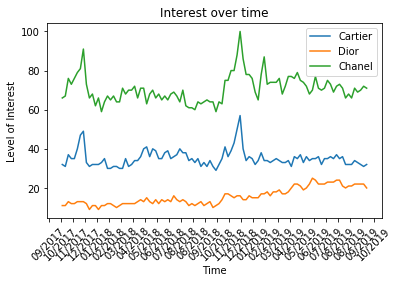

In [30]:
# x axis values: dates of the last n years (n defined above by the user)
numdays = 7
numweeks = 52

datelist = [begin_date]

for index in range (0, numweeks*numyears-3):
    datelist.append(datelist[index] + datetime.timedelta(days = numdays)) 
x_axis = datelist

# Plot into a chart 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(0,14*numyears))
plt.gcf().autofmt_xdate()

plt.plot (x_axis, interest_over_time_df.iloc[:,0], label = kw_1)
if q1.upper() == "YES":
    plt.plot (x_axis, interest_over_time_df.iloc[:,1], label = kw_2)
if q2.upper() == "YES":
    plt.plot (x_axis, interest_over_time_df.iloc[:,2], label = kw_3)

plt.xticks(rotation=45)

plt.xlabel('Time')
plt.ylabel('Level of Interest')
plt.title('Interest over time')

plt.legend()
plt.show()

### Average searches

An relevant data to compare is the average value of the interest of all the keywords within the timeframe of analysis. 

In [31]:
avg_kw = interest_over_time_df.mean(0)
print(f"The average interest in the last ",numyears,"years is ", avg_kw)

The average interest in the last  2 years is  Cartier    35.137255
Dior       15.588235
Chanel     70.647059
dtype: float64


## Interest by Region

The second output provided in the interest by region in the timeframe considered. 
Also in this case, the value provided is relative both within the countries and between the selected keywords. 
For the clarity of analysis, the regions with low interested (i.e. about 0) have been removed from the file.

The level of Region depends on whether a variable for country has been inserted by the user. In fact, if the user has not refine the search by country, the output by region will refer to the list of worldwide countries. 
If a country has been selected, the output by region will show the regions or states for that country.

In [61]:
interest_by_region_df = pytrend.interest_by_region(inc_low_vol=False)
print(interest_by_region_df.head())

                Cartier  Dior  Chanel
geoName                              
Afghanistan           0     0       0
Albania               0     0       0
Algeria              16    35      49
American Samoa        0     0       0
Andorra               0     0       0


The output obtained is exported to a csv file:

In [62]:
interest_by_region_df.to_csv("interest_by_region.csv", index=True)

A good way to look at this data is, for each of the keyword, to rank the countries in descendent order, in order to understand with are the countries registering the most and the least interest on the keyword. 


As additional note, in case US is selected, the code provided the interest in the different states, in case of Italy, the details of the region.

In [63]:
print('RANKED COUNTRIES FOR KEYWORD "',kw_1,'"' )
print("")
print(interest_by_region_df.sort_values(by=kw_1, ascending=False)[kw_1])

RANKED COUNTRIES FOR KEYWORD " Cartier "

geoName
Canada                               45
Romania                              36
Kuwait                               29
United Arab Emirates                 29
Qatar                                28
Saudi Arabia                         27
Morocco                              26
Switzerland                          24
Belgium                              22
France                               21
Lebanon                              21
Colombia                             20
Mexico                               19
Philippines                          18
Singapore                            17
United States                        17
Argentina                            16
Netherlands                          16
Azerbaijan                           16
Italy                                16
Algeria                              16
Tunisia                              15
Hong Kong                            15
Egypt                         

In [64]:
if q1.upper() == "YES":
    print('RANKED COUNTRIES FOR KEYWORD "',kw_2,'"' )
    print("")
    print(interest_by_region_df.sort_values(by=kw_2, ascending=False)[kw_2])

RANKED COUNTRIES FOR KEYWORD " Dior "

geoName
Japan                                42
Kazakhstan                           42
Taiwan                               40
Russia                               40
Czechia                              40
Ukraine                              40
France                               37
Tunisia                              37
Greece                               37
Bulgaria                             37
Poland                               36
Israel                               35
Algeria                              35
Nigeria                              34
Azerbaijan                           34
Vietnam                              34
Finland                              33
Lebanon                              33
Turkey                               33
Saudi Arabia                         33
Qatar                                33
Morocco                              33
Egypt                                32
Norway                           

In [65]:
if q2.upper() == "YES":
    print('RANKED COUNTRIES FOR KEYWORD "',kw_3,'"' )
    print("")
    print(interest_by_region_df.sort_values(by=kw_3, ascending=False)[kw_3])

RANKED COUNTRIES FOR KEYWORD " Chanel "

geoName
Indonesia                            74
Venezuela                            73
Pakistan                             72
Peru                                 72
Brazil                               70
Ireland                              67
India                                67
Hungary                              66
Denmark                              66
United States                        65
Chile                                65
South Africa                         65
Colombia                             64
Thailand                             64
Australia                            64
Croatia                              62
Portugal                             62
Philippines                          62
New Zealand                          62
Mexico                               61
Sweden                               61
Singapore                            61
Norway                               61
Poland                         

A visual output of top countries is provided below. In this case, an histogram results to be the most appropriate chart.

However, this visualization is most suited for cases where the user has selected a specific country so that the graph will show the ranked regions/states of that country. 

Interest by region



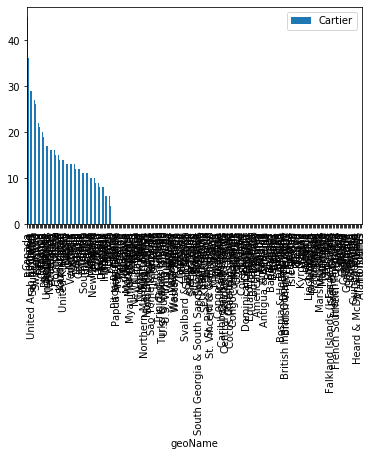

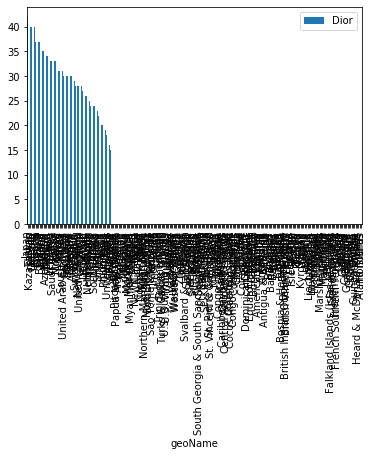

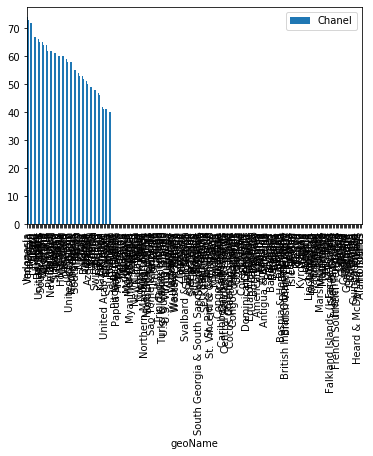

In [66]:
print("Interest by region")
print("")
interest_by_region_df.sort_values(kw_1, ascending=False)[[kw_1]].plot.bar(stacked=True)

if q1.upper() == "YES":
    interest_by_region_df.sort_values(kw_2, ascending=False)[[kw_2]].plot.bar(stacked=True)
if q2.upper() == "YES":
    interest_by_region_df.sort_values(kw_3, ascending=False)[[kw_3]].plot.bar(stacked=True)

## Related Queries

The third output provided by the code is about the related queries. In other words, the other words commonyl related to the keywords of analysis. 

In [39]:
related_queries_dict = pytrend.related_queries()
print(related_queries_dict)

{'Cartier': {'top':                        query  value
0              cartier watch    100
1                      watch     99
2            cartier glasses     64
3            cartier watches     39
4               cartier tank     34
5               cartier ring     26
6            cartier diamond     21
7             santos cartier     21
8                    tiffany     20
9              cartier rings     20
10                     rolex     20
11        cartier sunglasses     19
12          cartier bracelet     18
13               cartier men     17
14        cartier tank watch     17
15        cartier mens watch     11
16           cartier jewelry     10
17            cartier frames      9
18               rolex watch      9
19        gold cartier watch      9
20  cartier engagement rings      9
21          cartier necklace      9
22          cartier earrings      8
23              cartier band      8
24           cartier replica      8, 'rising':                                  

The data exported to csv, in this case, are very difficult to read, as shown in the output below.

In [40]:
(pd.DataFrame.from_dict(data=related_queries_dict, orient='index')
   .to_csv('related_queries_dict.csv', header=True))

For this reason, it has been decided to divide the dictionary into different outputs, one per keywords, that are much easier to read and intepret.
For each keywords, details of the Top and rising queries are provided separately. 

In [41]:
print('keyword = " ', kw_1,' " Top queries')
print("")
print(related_queries_dict[kw_1]["top"])

keyword = "  Cartier  " Top queries

                       query  value
0              cartier watch    100
1                      watch     99
2            cartier glasses     64
3            cartier watches     39
4               cartier tank     34
5               cartier ring     26
6            cartier diamond     21
7             santos cartier     21
8                    tiffany     20
9              cartier rings     20
10                     rolex     20
11        cartier sunglasses     19
12          cartier bracelet     18
13               cartier men     17
14        cartier tank watch     17
15        cartier mens watch     11
16           cartier jewelry     10
17            cartier frames      9
18               rolex watch      9
19        gold cartier watch      9
20  cartier engagement rings      9
21          cartier necklace      9
22          cartier earrings      8
23              cartier band      8
24           cartier replica      8


In [42]:
print('keyword = " ', kw_1,' " Rising queries')
print("")
print(related_queries_dict[kw_1]["rising"])

keyword = "  Cartier  " Rising queries

                                  query  value
0                         cartier bardi  36900
1                      cartier dopebwoy  16800
2                         cartier bazzi  15950
3                  cartier bardi lyrics  15950
4                       cartier bartier  12300
5                  cartier bazzi lyrics  11100
6                   cartier santos 2018  10050
7                      clash de cartier   8700
8               cartier dopebwoy lyrics   6300
9    cartier french tank watch two tone   4050
10  cartier glasses they sit on my face   3500
11           cartier gucci scarf lyrics   2850
12            cartier french tank watch    900
13                      cardi b cartier    650
14                        cartier clash    600
15                    bust down cartier    450
16                  cartier gucci scarf    400
17                   cartier halo tiara    350
18                       cartier vision    300
19              cart

In [43]:
if q1.upper() == "YES":
    print('keyword = " ', kw_2,' " Top queries')
    print("")
    print(related_queries_dict[kw_2]["top"])

keyword = "  Dior  " Top queries

              query  value
0    christian dior    100
1   dior sunglasses     77
2     dior sneakers     61
3        dior shoes     51
4          dior bag     49
5            chanel     39
6             gucci     37
7        dior homme     27
8          dior men     25
9      vintage dior     24
10    louis vuitton     23
11     dior glasses     20
12    dior handbags     20
13        dior bags     18
14    dior bracelet     16
15       dior shirt     14
16    dior earrings     14
17   dior nordstrom     13
18        lady dior     13
19            prada     13
20        dior tote     13
21            fendi     13
22        dior belt     12
23       dior boots     12
24       chanel bag     11


In [44]:
if q1.upper() == "YES":
    print('keyword = " ', kw_2,' " Rising queries')
    print("")
    print(related_queries_dict[kw_2]["rising"])

keyword = "  Dior  " Rising queries

                                 query  value
0                       dior book tote  53950
1                  dior woven bracelet  40950
2                          dior x kaws  34250
3                             dior b23  31650
4                          gianna dior  30250
5                    dior b22 sneakers  28700
6                             joy dior  28350
7                            iann dior  24650
8         christian dior mens sneakers  22800
9                          dior chucks  20450
10                    dior b22 sneaker  19800
11                         amiri jeans  18700
12           dior friendship bracelets  14500
13  christian dior friendship bracelet  14450
14                     dior kaws shirt  14350
15               dior oblique sneakers  13800
16             christian dior headband  13650
17                   dior chuck taylor  11600
18                  dior messenger bag  11200
19                          dior clogs   94

In [45]:
if q2.upper() == "YES":
    print('keyword = " ', kw_3,' " Top queries')
    print("")
    print(related_queries_dict[kw_2]["top"])

keyword = "  Chanel  " Top queries

              query  value
0    christian dior    100
1   dior sunglasses     77
2     dior sneakers     61
3        dior shoes     51
4          dior bag     49
5            chanel     39
6             gucci     37
7        dior homme     27
8          dior men     25
9      vintage dior     24
10    louis vuitton     23
11     dior glasses     20
12    dior handbags     20
13        dior bags     18
14    dior bracelet     16
15       dior shirt     14
16    dior earrings     14
17   dior nordstrom     13
18        lady dior     13
19            prada     13
20        dior tote     13
21            fendi     13
22        dior belt     12
23       dior boots     12
24       chanel bag     11


In [46]:
if q2.upper() == "YES":
    print('keyword = " ', kw_3,' " Rising queries')
    print("")
    print(related_queries_dict[kw_2]["rising"])

keyword = "  Chanel  " Rising queries

                                 query  value
0                       dior book tote  53950
1                  dior woven bracelet  40950
2                          dior x kaws  34250
3                             dior b23  31650
4                          gianna dior  30250
5                    dior b22 sneakers  28700
6                             joy dior  28350
7                            iann dior  24650
8         christian dior mens sneakers  22800
9                          dior chucks  20450
10                    dior b22 sneaker  19800
11                         amiri jeans  18700
12           dior friendship bracelets  14500
13  christian dior friendship bracelet  14450
14                     dior kaws shirt  14350
15               dior oblique sneakers  13800
16             christian dior headband  13650
17                   dior chuck taylor  11600
18                  dior messenger bag  11200
19                          dior clogs   

# Keyword suggestions

In this section, it is possible for the user, given the output of the previous analysis, to look for suggestions of new kewwords or string related to a specific keyword or string. 

This output can provide significant insights as it can reveal some words associations that companies might not be aware of. 

In [53]:
keyword = input("Please write your keyword: ")

Please write your keyword: cartier watch


In [54]:
suggestions_dict = pytrend.suggestions(keyword)

print('SUGGESTED RELATED KEYWORDS RELATED TO "', keyword, '"')
print("")
for number in range(0,len(suggestions_dict)):
    print("\n".join("{}\t{}".format(k, v) for k, v in suggestions_dict[number].items()))
    print("")

SUGGESTED RELATED KEYWORDS RELATED TO " cartier watch "

mid	/m/04799f2
title	Cartier Tank
type	Line of products

mid	/g/11g02vjngy
title	Sell Cartier Watch
type	Watch store in London, England

mid	/g/11dzswn26w
title	The Watch Book
type	Topic

mid	/m/0gjkl
title	Watch
type	Topic



# Additional output: Google Hot Trends

Lastly, is has been included this last section where the user can see what are the most popular searches performed in the last period and the searches of the current day.

Although not related with the keywords above, it can be useful to understand what are the key topics researched recently and to run specific marketing campaigns accordingly.

In [49]:
trending_searches_df = pytrend.trending_searches()
print(trending_searches_df.head())

                 0
0          Packers
1  Saints vs Bears
2            49ers
3           Giants
4    Buffalo Bills


Export trending searches into a csv file:

In [50]:
trending_searches_df.to_csv("trending_searches.csv", index=True)

In [51]:
today_searches_df = pytrend.today_searches()
print(today_searches_df.head())

0            Packers
1    Saints vs Bears
2              49ers
3      David Johnson
4      Detroit Lions
Name: query, dtype: object


Export today searches into a csv file:

In [52]:
today_searches_df.to_csv("today_searches.csv", index=True, header=True)